피마 인디언 당뇨병 데이터 세트 예측

<데이터 세트 설명>
데이터 세트 설명 : 북아메리카 피마 지역 원주민의 당뇨병 결과 데이터
당뇨 원인 : 식습관과 유전
피마 지역 특성 : 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 20세기 후반부터 서구화된 식습관으로 많은 당뇨 환자가 생김

<피처 설명>
- Pregnancies : 임신횟수
- Glucose : 포도당 부하 검사 수치
- BloodPressure : 혈압
- SkinThickness : 삼두근 뒤쪽 피하지방 측정값
- Insulin : 혈청 인슐린
- BMI : 체질량지수
- DiabetesPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이
- Outcome : 클래스 결정 값 (0 또는 1)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv(r'C:\Users\ADMIN\PycharmProjects\ESAA\data\diabetes.csv')
print(data['Outcome'].value_counts())
data.head(5)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


살펴본 결과 : negative 가 500개 positive 가 268개

In [9]:
data.info() #피처의 타입과 NULL 개수 살펴보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


눌 값은 없고, 피처의 타입은 모두 숫자형이다. 따라서 별도의 피처 인코딩은 필요하지 않음.
이제 로지스틱 회귀를 이용해 예측 모델을 생성

In [19]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC_AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도:{0:4f}, 정밀도 : {1:4f}, 재현율 : {2:4f}, \
        F1: {3:4f}, AUC:{4:4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [20]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y 를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1 을 이용해 추출
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도:0.772727, 정밀도 : 0.720930, 재현율 : 0.574074,         F1: 0.639175, AUC:0.791852


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


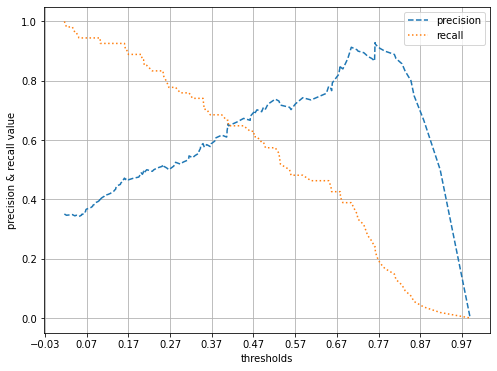

In [21]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

재현율 곡선을 보면 임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞춰진다.
그러나 두 지표 모두 0.7이 안되는 수치. 여전히 두 지표의 값이 낮다.

In [22]:
# 원본 데이터 피처 값의 분포도 살펴보기
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


min() 값이 0으로 되어 있는 피처가 많다.

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

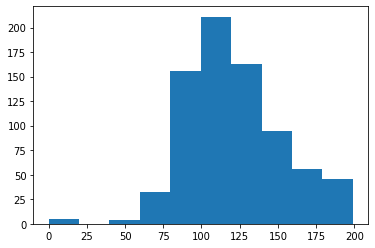

In [24]:
plt.hist(data['Glucose'], bins = 10)

min() 값이 0 으로 되어 있는 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인

In [26]:
# 0 값을 검사할 피처 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = data['Glucose'].count()

# 피처 별로 반복하면서 데이터 값이 0 인 데이터 건수 추출 및 퍼센트 계산
for feature in zero_features:
    zero_count = data[data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.651042 %
BloodPressure 0 건수는 35, 퍼센트는 4.557292 %
SkinThickness 0 건수는 227, 퍼센트는 29.557292 %
Insulin 0 건수는 374, 퍼센트는 48.697917 %
BMI 0 건수는 11, 퍼센트는 1.432292 %


SkinThickness와 Insulin 의 0 값은 전체의 대략 30%, 50%로 대단히 많다.

전체 데이터 건수가 많지 않기 때문에, 이들 데이터를 일괄적으로 삭제할 경우 핛브을 효과적으로 수행하기 어려움. 따라거 위 피처의 0 값을 평균값으로 대체.

In [27]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=data[zero_features].replace(0, mean_zero_features)

0 값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 반환.
로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋음.
이후에 다시 학습/테스트 데이터 세트로 나누고 로지스틱 회귀를 적용해 성능 평가 지표를 확인해보겠다.

In [29]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size =0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도:0.798701, 정밀도 : 0.767442, 재현율 : 0.611111,         F1: 0.680412, AUC:0.843333


데이터 변환과 스케일링을 통해 성능 수치가 일정수준 개선이 되었다.
로지스틱 회귀에 대해 본격적으로 학습하지 않았으니, 하이퍼 파라미터에 대한 튜닝은 생략
하지만 여전히 재현율 수치는 개선이 필요

In [ ]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임곗값: {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)